# PROJET DEEP LEARNING

## ARNAUD WATUSADISI MAVAKALA

### Ce travail traite la reconnaissance des chiffres écrits à la main venant de jeu des donnees mnist

In [0]:
import tensorflow as tf
import keras

In [51]:
keras.__version__

'2.2.5'

In [0]:
from keras.datasets import mnist

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
assert(len(x_train)==60000)
assert(len(x_test)==10000)

In [55]:
x_train.shape

(60000, 28, 28)

In [56]:
x_test.shape

(10000, 28, 28)

In [0]:
from keras.models import Sequential
from keras.layers import Dense , Activation
from keras.layers import Dropout # pour tester l'erreur
from keras.optimizers import SGD

In [58]:
model = Sequential([Dense(512, input_shape=(28*28,)), Activation('relu'), Dense(10),Activation('softmax'),])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_10 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                5130      
_________________________________________________________________
activation_11 (Activation)   (None, 10)                0         
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [29]:
classifier=Sequential()
classifier.add(Dense(512, kernel_initializer='uniform', activation='relu', input_shape=(28*28,)))
classifier.add(Dropout(rate=0.001)) #0.00001
#classifier.add(Dense(6,kernel_initializer='uniform',activation='relu')) # essayer avec la fonction leakyrelu
classifier.add(Dense(10,kernel_initializer='uniform',activation='softmax')) # essayer avec la fonction softmax
classifier.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [43]:
(x_train.shape[1]*x_train.shape[2]+1)*512

401920

In [0]:
model.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=['accuracy'])

In [60]:
import numpy as np

x_train = x_train.reshape(60000, 28*28).astype(np.float)/255
x_train.shape

(60000, 784)

In [0]:
assert(x_train.dtype == "float")
assert(int(100 * x_train.mean()) == 13)

In [63]:
x_train.mean()

0.1306604762738429

In [65]:
x_test = x_test.reshape(10000, 28*28).astype(np.float)/255
x_test.shape

(10000, 784)

In [0]:
assert(x_test.dtype == "float")
assert(int(100 * x_test.mean()) == 13)

In [0]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
assert(y_train.shape ==(60000, 10))
assert(y_test.shape ==(10000, 10))

In [70]:
y_test.shape

(10000,)

In [114]:
model.fit(x=x_train, y=y_train, epochs=8, batch_size=250, workers=3)

Epoch 1/8
60000/60000 [==============================] - 3s 58us/step - loss: 8.5264e-04 - acc: 0.9998
Epoch 2/8
60000/60000 [==============================] - 3s 58us/step - loss: 3.9251e-04 - acc: 0.9999
Epoch 3/8
60000/60000 [==============================] - 3s 58us/step - loss: 3.1875e-04 - acc: 1.0000
Epoch 4/8
60000/60000 [==============================] - 3s 58us/step - loss: 3.1651e-04 - acc: 1.0000
Epoch 5/8
60000/60000 [==============================] - 3s 58us/step - loss: 3.4280e-04 - acc: 0.9999
Epoch 6/8
60000/60000 [==============================] - 4s 59us/step - loss: 2.9678e-04 - acc: 1.0000
Epoch 7/8
60000/60000 [==============================] - 3s 58us/step - loss: 2.8603e-04 - acc: 1.0000
Epoch 8/8
60000/60000 [==============================] - 3s 58us/step - loss: 2.7765e-04 - acc: 1.0000


In [115]:
a, accuracy1=model.evaluate(x_train,y_train,batch_size=256)

60000/60000 [==============================] - 1s 22us/step


In [116]:
print('test_acc:', accuracy1)

test_acc: 0.9999833333015442


In [117]:
model.fit(x=x_test, y=y_test, epochs=8, batch_size=250, workers=3)

Epoch 1/8
10000/10000 [==============================] - 1s 59us/step - loss: 0.0198 - acc: 0.9954
Epoch 2/8
10000/10000 [==============================] - 1s 58us/step - loss: 0.0035 - acc: 0.9993
Epoch 3/8
10000/10000 [==============================] - 1s 58us/step - loss: 0.0019 - acc: 0.9999
Epoch 4/8
10000/10000 [==============================] - 1s 59us/step - loss: 0.0017 - acc: 0.9999
Epoch 5/8
10000/10000 [==============================] - 1s 57us/step - loss: 0.0017 - acc: 0.9999
Epoch 6/8
10000/10000 [==============================] - 1s 57us/step - loss: 0.0016 - acc: 0.9999
Epoch 7/8
10000/10000 [==============================] - 1s 57us/step - loss: 0.0017 - acc: 0.9999
Epoch 8/8
10000/10000 [==============================] - 1s 58us/step - loss: 0.0016 - acc: 0.9999


In [118]:
a, accuracy=model.evaluate(x_test,y_test,batch_size=256)

10000/10000 [==============================] - 0s 23us/step


In [119]:
print('test_acc:', accuracy)

test_acc: 0.9999


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 

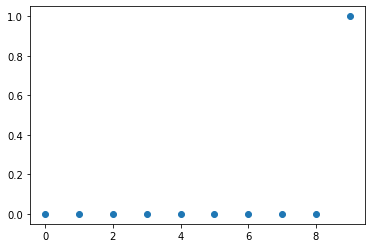

In [121]:
%matplotlib inline
import pylab as plt

rdn = np.random.choice(range(10000))
vfunc = np.vectorize(round)
print(vfunc(x_test[rdn]).reshape((28,28)).astype(int))

plt.plot(range(10), model.predict(x_test[rdn:rdn+1]).reshape(10),'o')

In [122]:
model.get_weights()

[array([[ 3.9348751e-04,  2.3246109e-02,  5.0481834e-02, ...,
         -2.8851252e-02,  6.6132128e-02, -8.6262561e-03],
        [-4.1633978e-02,  1.5377454e-02,  2.9753201e-02, ...,
         -3.1551506e-02,  9.1242194e-03, -5.9855580e-02],
        [-8.1204288e-03,  8.7354481e-03,  4.7071911e-02, ...,
          6.5394744e-02, -3.1672560e-02,  5.0748140e-03],
        ...,
        [-6.2392574e-02, -4.9363598e-03, -7.9281628e-05, ...,
          4.0924706e-02, -1.6934279e-02,  4.1612551e-02],
        [-1.5160270e-02,  4.3289579e-02, -4.4698410e-02, ...,
          1.5892029e-02, -5.8739435e-02,  4.8043340e-02],
        [ 3.9918944e-03, -4.2573169e-02, -2.4937049e-02, ...,
         -4.0983059e-02,  5.8685765e-03,  3.6452368e-02]], dtype=float32),
 array([-2.52503213e-02, -1.57486737e-01,  4.29550372e-02,  1.83693115e-02,
         2.35576043e-03,  3.33889052e-02, -5.38907982e-02, -9.53758042e-03,
        -3.39760096e-03, -6.39031902e-02, -1.36824086e-01, -6.93771290e-03,
        -6.73247203e-0

# THANKS